In [1]:
library('tidyverse')
library('palmerpenguins')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


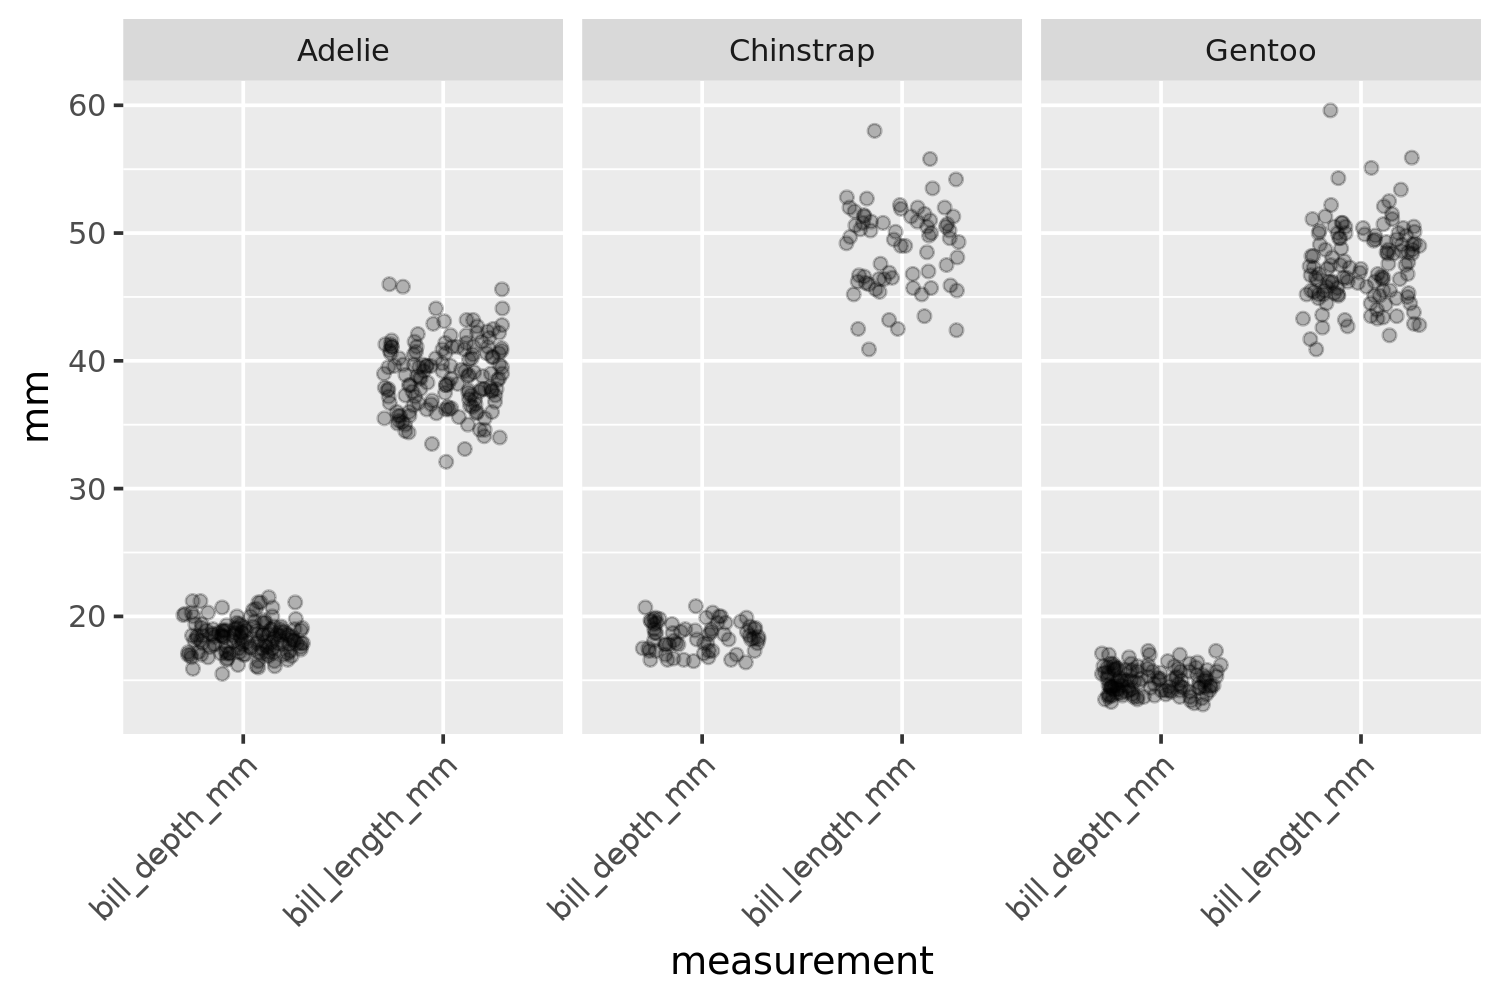

In [2]:
options(repr.plot.res = 250, repr.plot.height = 4, repr.plot.width = 6)

penguins |>
    pivot_longer(starts_with('bill_'), names_to = 'measurement') |>

ggplot(aes(x = measurement, y = value)) + 
    geom_point(alpha = 0.25, na.rm = T, position = position_jitter(width = 0.3, height = 0)) +
    facet_wrap(~species, nrow = 1) +
    labs(y = 'mm') +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [11]:
penguins_long = penguins |>
    mutate(penguin_id = row_number()) |>
    pivot_longer(c(bill_depth_mm, bill_length_mm),
                names_to = 'measurement',
                values_to = 'measurement_value') |>
    arrange(measurement_value)

penguins_long |> head()

species,island,flipper_length_mm,body_mass_g,sex,year,penguin_id,measurement,measurement_value
<fct>,<fct>,<int>,<int>,<fct>,<int>,<int>,<chr>,<dbl>
Gentoo,Biscoe,215,5000,female,2007,177,bill_depth_mm,13.1
Gentoo,Biscoe,211,4500,female,2007,153,bill_depth_mm,13.2
Gentoo,Biscoe,213,5100,female,2008,201,bill_depth_mm,13.3
Gentoo,Biscoe,209,4400,female,2007,161,bill_depth_mm,13.4
Gentoo,Biscoe,210,4550,female,2007,158,bill_depth_mm,13.5
Gentoo,Biscoe,210,4150,female,2007,169,bill_depth_mm,13.5


In [12]:
penguins_long |>
    filter(penguin_id == 177)

species,island,flipper_length_mm,body_mass_g,sex,year,penguin_id,measurement,measurement_value
<fct>,<fct>,<int>,<int>,<fct>,<int>,<int>,<chr>,<dbl>
Gentoo,Biscoe,215,5000,female,2007,177,bill_depth_mm,13.1
Gentoo,Biscoe,215,5000,female,2007,177,bill_length_mm,42.9


In [16]:
penguins_wide = penguins_long |>
    mutate(penguin_id = row_number()) |>
    pivot_wider(names_from = c(measurement),
                values_from = c(measurement_value))

penguins_wide |> head()

species,island,flipper_length_mm,body_mass_g,sex,year,penguin_id,bill_depth_mm,bill_length_mm
<fct>,<fct>,<int>,<int>,<fct>,<int>,<int>,<dbl>,<dbl>
Gentoo,Biscoe,215,5000,female,2007,1,13.1,NA
Gentoo,Biscoe,211,4500,female,2007,2,13.2,NA
Gentoo,Biscoe,213,5100,female,2008,3,13.3,NA
Gentoo,Biscoe,209,4400,female,2007,4,13.4,NA
Gentoo,Biscoe,210,4550,female,2007,5,13.5,NA
Gentoo,Biscoe,210,4150,female,2007,6,13.5,NA


[Google Sheet example](https://docs.google.com/spreadsheets/d/1t085cM-8GLGHk7ZAqtTambrGi7PR1yXZgID964rg5Qw/edit#gid=1425423640)

# `pivot_longer`

In [3]:
iris |> as_tibble() |> print()

# A tibble: 150 × 5
   Sepal.Length Sepal.Width Petal.Length Petal.Width Species
          <dbl>       <dbl>        <dbl>       <dbl> <fct>  
 1          5.1         3.5          1.4         0.2 setosa 
 2          4.9         3            1.4         0.2 setosa 
 3          4.7         3.2          1.3         0.2 setosa 
 4          4.6         3.1          1.5         0.2 setosa 
 5          5           3.6          1.4         0.2 setosa 
 6          5.4         3.9          1.7         0.4 setosa 
 7          4.6         3.4          1.4         0.3 setosa 
 8          5           3.4          1.5         0.2 setosa 
 9          4.4         2.9          1.4         0.2 setosa 
10          4.9         3.1          1.5         0.1 setosa 
# ℹ 140 more rows


How would we compare distribution of values for each measurement?

![](https://github.com/gadenbuie/tidyexplain/raw/main/images/tidyr-pivoting.gif)

In [4]:
iris |>
    as_tibble() |>
    pivot_longer(cols = c(Sepal.Length, Sepal.Width, Petal.Length, Petal.Width)) |>
    print()

# A tibble: 600 × 3
   Species name         value
   <fct>   <chr>        <dbl>
 1 setosa  Sepal.Length   5.1
 2 setosa  Sepal.Width    3.5
 3 setosa  Petal.Length   1.4
 4 setosa  Petal.Width    0.2
 5 setosa  Sepal.Length   4.9
 6 setosa  Sepal.Width    3  
 7 setosa  Petal.Length   1.4
 8 setosa  Petal.Width    0.2
 9 setosa  Sepal.Length   4.7
10 setosa  Sepal.Width    3.2
# … with 590 more rows


In [5]:
iris |>
    as_tibble() |>
    pivot_longer(cols = c(Sepal.Length, Sepal.Width, Petal.Length, Petal.Width)) |>
    print()

# A tibble: 600 × 3
   Species name         value
   <fct>   <chr>        <dbl>
 1 setosa  Sepal.Length   5.1
 2 setosa  Sepal.Width    3.5
 3 setosa  Petal.Length   1.4
 4 setosa  Petal.Width    0.2
 5 setosa  Sepal.Length   4.9
 6 setosa  Sepal.Width    3  
 7 setosa  Petal.Length   1.4
 8 setosa  Petal.Width    0.2
 9 setosa  Sepal.Length   4.7
10 setosa  Sepal.Width    3.2
# … with 590 more rows


In [6]:
iris |>
    as_tibble() |>
    pivot_longer(!Species) |>
    print()

# A tibble: 600 × 3
   Species name         value
   <fct>   <chr>        <dbl>
 1 setosa  Sepal.Length   5.1
 2 setosa  Sepal.Width    3.5
 3 setosa  Petal.Length   1.4
 4 setosa  Petal.Width    0.2
 5 setosa  Sepal.Length   4.9
 6 setosa  Sepal.Width    3  
 7 setosa  Petal.Length   1.4
 8 setosa  Petal.Width    0.2
 9 setosa  Sepal.Length   4.7
10 setosa  Sepal.Width    3.2
# … with 590 more rows


In [7]:
# Plot histogram of each "name"

iris_long = iris |>
    as_tibble() |>
    pivot_longer(cols = !c(Species))

# `pivot_wider`

![](https://github.com/gadenbuie/tidyexplain/raw/main/images/tidyr-pivoting.gif)

In [8]:
iris_long |> print()

# A tibble: 600 × 3
   Species name         value
   <fct>   <chr>        <dbl>
 1 setosa  Sepal.Length   5.1
 2 setosa  Sepal.Width    3.5
 3 setosa  Petal.Length   1.4
 4 setosa  Petal.Width    0.2
 5 setosa  Sepal.Length   4.9
 6 setosa  Sepal.Width    3  
 7 setosa  Petal.Length   1.4
 8 setosa  Petal.Width    0.2
 9 setosa  Sepal.Length   4.7
10 setosa  Sepal.Width    3.2
# … with 590 more rows


In [9]:
# Why won't this work?

# iris_long %>% 
#     pivot_wider(names_from = name, values_from = value)

In [10]:
iris |>
    as_tibble() |>
    mutate(id = row_number()) |> print()

# A tibble: 150 × 6
   Sepal.Length Sepal.Width Petal.Length Petal.Width Species    id
          <dbl>       <dbl>        <dbl>       <dbl> <fct>   <int>
 1          5.1         3.5          1.4         0.2 setosa      1
 2          4.9         3            1.4         0.2 setosa      2
 3          4.7         3.2          1.3         0.2 setosa      3
 4          4.6         3.1          1.5         0.2 setosa      4
 5          5           3.6          1.4         0.2 setosa      5
 6          5.4         3.9          1.7         0.4 setosa      6
 7          4.6         3.4          1.4         0.3 setosa      7
 8          5           3.4          1.5         0.2 setosa      8
 9          4.4         2.9          1.4         0.2 setosa      9
10          4.9         3.1          1.5         0.1 setosa     10
# … with 140 more rows


In [11]:
# Plat Sepal.Length vs. Sepal.Width (starting with iris_long2)

# iris_long2 = iris |>
#     as_tibble() |>
#     mutate(id = row_number()) |>
#     pivot_longer(cols = !c(Species, id))

# iris_wide = iris_long2 |>
#     pivot_wider(id_cols = c(id, Species), names_from = name, values_from = value)